In [12]:
import os

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
train_data_dir = 'dataset'
image_size = (128, 128)
batch_size = 32

In [26]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)


Found 634 images belonging to 23 classes.
Found 158 images belonging to 23 classes.
Classes: ['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']


In [22]:
import os
print(sorted(os.listdir("dataset")))


['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia (1).jpg', 'senegalia (10).jpg', 'senegalia (11).jpg', 'senegalia (12).jpg', 'senegalia (13).jpg', 'senegalia (14).jpg', 'senegalia (15).jpg', 'senegalia (16).jpg', 'senegalia (17).jpg', 'senegalia (18).jpg', 'senegalia (19).jpg', 'senegalia (2).jpg', 'senegalia (20).jpg', 'senegalia (21).jpg', 'senegalia (22).jpg', 'senegalia (23).jpg', 'senegalia (24).jpg', 'senegalia (25).jpg', 'senegalia (26).jpg', 'senegalia (27).jpg', 'senegalia (28).jpg', 'senegalia (29).jpg', 'senegalia (3).jpg', 'senegalia (30).jpg', 'senegalia (31).jpg', 'senegalia (32).jpg', 'senegalia (33).jpg', 'senegalia (34).jpg', 'senegalia (35).jpg', 'senegalia (4).jpg', 'senegalia (5).jpg', 'senegalia (6).jpg', 'senegalia (7).jpg', 'senegalia (8).jpg', 'senegalia (9).jpg', 'serjania', 'syagrus', 'tr

In [23]:
import os
print(sorted(os.listdir("dataset")))


['anadenanthera', 'arecaceae', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum', 'croton', 'dipteryx', 'eucalipto', 'faramea', 'hyptis', 'mabea', 'matayba', 'mimosa', 'myrcia', 'protium', 'qualea', 'schinus', 'senegalia', 'serjania', 'syagrus', 'tridax', 'urochloa']


In [28]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(128, 128, 3)),  # ✅ Use Input layer instead of input_shape in Conv2D
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])



In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('model.h5', save_best_only=True)
]

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.5397 - loss: 1.3896

20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 685ms/step - accuracy: 0.5392 - loss: 1.3914 - val_accuracy: 0.6203 - val_loss: 1.2842
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.5679 - loss: 1.2917

20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 890ms/step - accuracy: 0.5681 - loss: 1.2925 - val_accuracy: 0.6203 - val_loss: 1.2218
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.5592 - loss: 1.3270

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 975ms/step - accuracy: 0.5611 - loss: 1.3223 - val_accuracy: 0.6835 - val_loss: 1.1489
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 947ms/step - accuracy: 0.6283 - loss: 1.0471 - val_accuracy: 0.6709 - val_loss: 1.1893
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 754ms/step - accuracy: 0.6599 - loss: 1.0303 - val_accuracy: 0.6835 - val_loss: 1.1757
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 826ms/step - accuracy: 0.6777 - loss: 0.9431 - val_accuracy: 0.6772 - val_loss: 1.1555


In [34]:
import json

with open("classes.json", "w") as f:
    json.dump(class_names, f)

print("✅ model.h5 and classes.json saved!")


✅ model.h5 and classes.json saved!


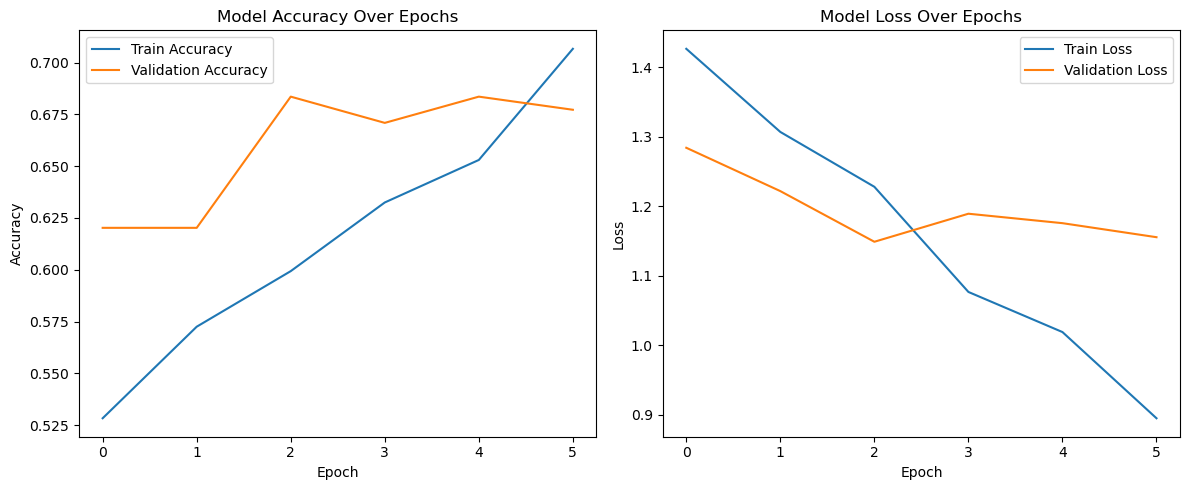

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
